In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from statistics import mean
from scipy.spatial.distance import cdist

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\datasets\base.py:241: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note

In [4]:
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [5]:
data = iris_df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]]
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
def kmeans(x,k, no_of_iterations):
    
    
    idx = np.random.choice(len(x), k, replace=False)
    centroids = x.iloc[idx, :] 
    
    
    distances = cdist(x, centroids ,'euclidean') 
     
    
    points = np.array([np.argmin(i) for i in distances]) 
     
    
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids)  
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
        
        
    Sum = []
    for j in range(k):
        sums = (abs((np.linalg.norm(x[points == j]) - np.linalg.norm(centroids[j])))**2).sum()
        Sum.append(sums)
    Cost = np.sum(Sum)/len(x)
    
    return points , Cost
        
         

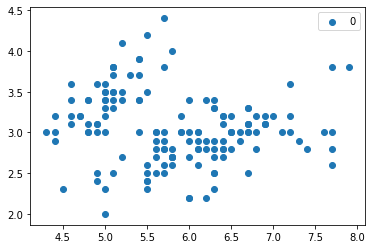

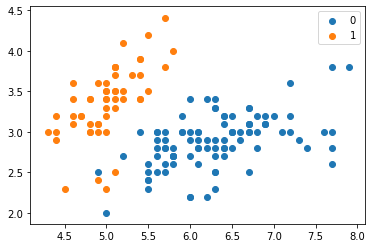

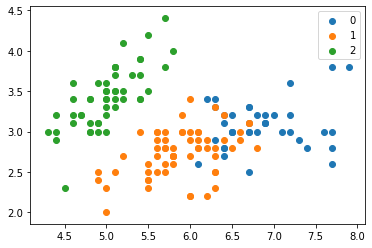

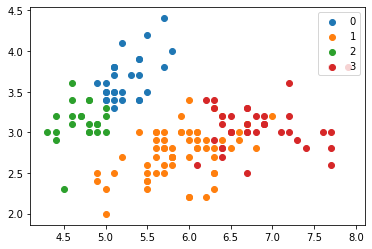

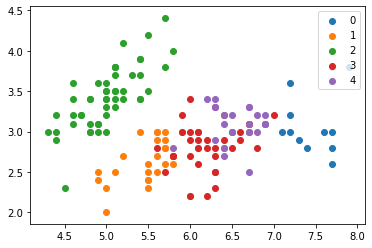

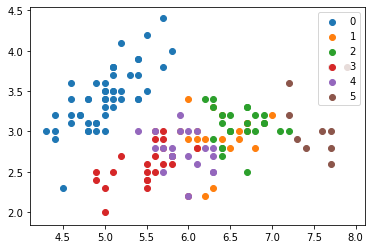

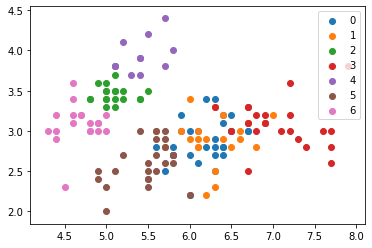

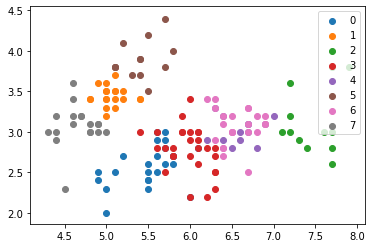

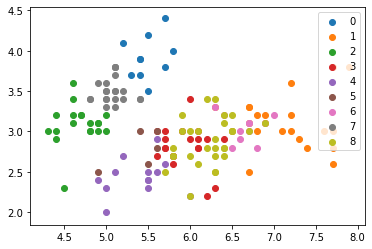

In [7]:
Cost_list=[]
for k in range(1,10) :
    points , Cost = kmeans(data , k , 100)
    Cost_list.append(Cost)
    label = points
    u_labels = np.unique(label)
    for i in u_labels:
        plt.scatter(data.iloc[label == i , 0] , data.iloc[label == i , 1] , label = i)
    plt.legend(loc='upper right')
    
    plt.show()


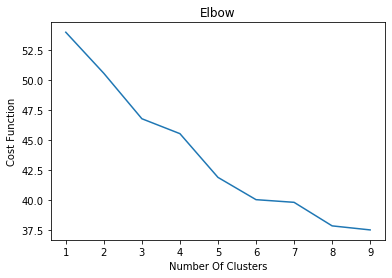

In [8]:
clusters = list(range(1,10))
plt.plot(clusters , Cost_list)
plt.title("Elbow")
plt.xlabel("Number Of Clusters")
plt.ylabel("Cost Function")
plt.show()